Laboratory #1: An Introduction to the Numerical Solution of Differential Equations: Discretization
=============================================

John M. Stockie

Contents
=====

- [List of Problems](#List-of-Problems)
- [1. Objectives](#1.-Objectives)
- [2. Readings](#2.-Readings)
- [3. Introduction](#3.-Introduction)
  * [3.1 Ordinary Differential Equations](#3.1-Ordinary-Differential-Equations)
  * [3.2 Partial Differential Equations](#3.2-Partial-Differential-Equations)
- [4. Discretization](#4.-Discretization)
- [5. Difference Approximations to the First Derivative](#5.-Difference-Approximations-to-the-First-Derivative)
  * [5.1 Forward Euler Method](#5.1-Forward-Euler-Method)
  * [5.2 Other Approximations](#5.2-Other-Approximations)
- [6. Generalizations](#6.-Generalizations)
  * [6.1 Higher Derivatives](#6.1-Higher-Derivatives)
  * [6.2 Systems of First-order ODE's](#6.2-Systems-of-First-order-ODE's)
  * [6.3 Boundary Value Problems](#6.3-Boundary-Value-Problems)
  * [6.4 Partial Differential Equations](#6.4-Partial-Differential-Equations)
- [Mathematical Notes](#Mathematical-Notes)
  * [Solution to the Heat Conduction Equation](#Solution-to-the-Heat-Conduction-Equation)
- [References](#References)
- [Glossary](#Glossary)




List of Problems
=========
- [Problem One](#Problem-One)
- [Problem Two](#Problem-Two)

1. Objectives
==========

The examples and exercises in this lab are meant to illustrate the
limitations of analytical solution techniques, using several
differential equation models for simple physical systems. This is the
prime motivation for the use of numerical methods.

After completing this lab, you will understand the process of
*discretizing* a continuous problem, and be able to derive a simple
finite difference approximation for an ordinary or partial differential
equation. The examples will also introduce the concepts of *accuracy*
and *stability*, which will be discussed further in Lab 2.

Specifically you will be able to:

-   Define the term or identify: Ordinary Differential Equation, Partial
    Differential Equation, Linear equation, Non-linear equation, Initial
    value problem, Boundary value problem, Open Domain, and Closed
    Domain.

-   Define the term, identify or perform: Forward difference
    discretization, Backward difference discretization, and Centre
    difference discretization.

-   Define the term: Interpolation, Convergence, and Instability.

-   Define the term or perform: Linear interpolation.


2. Readings
========

There is no required reading for this lab, beyond the contents of the
lab itself. However, if you would like additional background on any of
the following topics, then refer to the sections indicated below:

-   <span>**Differential Equations:**</span>

    -    [Strang (1986)](#Ref:Strang), Chapter 6 (ODE’s).

    -    [Boyce and DiPrima (1986)](#Ref:BoyceDiPrima) (ODE’s and PDE’s).

-   <span>**Numerical Methods:**</span>

    -    [Strang (1986)](#Ref:Strang), Section 5.1.

    -    [Garcia (1994)](#Ref:Garcia), Sections 1.4–1.5, Chapter 2 (a basic introduction to
        numerical methods for problems in physics).

    -    [Boyce and DiPrima (1986)](#Ref:BoyceDiPrima), Sections 8.1–8.5, 8.7, 8.8.

*Running Code Cells*
-------------------

The next cell in this notebook is a code cell.  Run it by selecting it and hitting ctrl enter, or by selecting it and hitting the run button (arrow to right) in the notebook controls.

In [4]:
from IPython.display import Image
# import plotting package and numerical python package for use in examples later
import matplotlib.pyplot as plt
# make the plots happen inline
% matplotlib inline  
# import the numpy array handling library
import numpy as np
# import the quiz script
import numlabs
import numlabs.lab1.quiz1 as quiz

ImportError: No module named lab1.quiz1

3. Introduction: Why bother with numerical methods?
================================================
[lab1:sec:intro]: <#3-Introduction:-Why-bother-with-numerical-methods?> "Intro"

In introductory courses in ordinary and partial differential equations
(ODE’s and PDE’s), many analytical techniques are introduced for
deriving solutions. These include the methods of undetermined
coefficients, variation of parameters, power series, Laplace transforms,
separation of variables, Fourier series, and phase plane analysis, to
name a few. When there are so many analytical tools available, one is
led to ask:

> *Why bother with numerical methods at all?*

The fact is that the class of problems that can be solved analytically
is *very small*. Most differential equations that model physical
processes cannot be solved explicitly, and the only recourse available
is to use a numerical procedure to obtain an approximate solution of the
problem.

Furthermore, even if the equation can be integrated to obtain a closed
form expression for the solution, it may sometimes be much easier to
approximate the solution numerically than to evaluate it analytically.

In the following two sections, we introduce two classical physical
models, seen in most courses in differential equations. Analytical
solutions are given for these models, but then seemingly minor
modifications are made which make it difficult (if not impossible) to
calculate actual solution values using analytical techniques. The
obvious alternative is to use numerical methods.

3.1 Ordinary Differential Equations
---------------------------------
<!--- {#lab1:sec:odes} -->
[lab1:sec:odes]: <#3.1-Ordinary-Differential-Equations> "ODES"

In order to demonstrate the usefulness of numerical methods, let’s start
by looking at an example of a *first-order initial value problem* (or
*IVP*). In their most general form, these equations look like

<div id='lab1:eq:modelode'>
(Model ODE)
$$\begin{array}{c}
    {\displaystyle \frac{dy}{dt} = f(y,t),} \\
    \; \\
    y(0) = y_0, 
  \end{array}$$
</div>

where

-   $t$ is the *independent variable* (in many physical systems, which
    change in time, $t$ represents time);

-   $y(t)$ is the unknown quantity (or *dependent variable*) that we
    want to solve for;

-   $f(y,t)$ is a known function that can depend on both $y$ and $t$;
    and

-   $y_0$ is called the *initial value* or *initial condition*, since it
    provides a value for the solution at an initial time, $t=0$ (the
    initial value is required so that the problem has a unique
    solution).

This problem involves the first derivative of the solution, and also
provides an initial value for $y$, and hence the name “first-order
initial value problem”.

Under certain very general conditions on the right hand side function
$f$, we know that there will be a unique solution to the problem ([Model ODE](#lab1:eq:modelode)).
However, only in very special cases can we actually write down a
closed-form expression for the solution.

In the remainder of this section, we will leave the general equation,
and investigate a specific example related to heat conduction. It will
become clear that it is the problems which *do not have exact solutions*
which are the most interesting or meaningful from a physical standpoint.


*Example One*
------------
<!--- {#lab1:exm:conduction} -->
[lab1:exm:conduction]: <#Example-One> "Example 1"

> Consider a small rock, surrounded by air or water,
which gains or loses heat only by conduction with its surroundings
(there are no radiation effects). If the rock is small enough, then we
can ignore the effects of diffusion of heat within the rock, and
consider only the flow of heat through its surface, where the rock
interacts with the surrounding medium.

> It is well known from experimental observations that the rate at which
the temperature of the rock changes is proportional to the difference
between the rock’s surface temperature, $T(t)$, and the *ambient
temperature*, $T_a$ (the ambient temperature is simply the temperature
of the surrounding material, be it air, water, …). This relationship is
expressed by the following ordinary differential equation
<div id='lab1:eq:conduction1d'>
(Conduction 1d)
$$%    \textcolor[named]{Red}{\frac{dT}{dt}} = -\lambda \,
%    \textcolor[named]{Blue}{(T-T_a)} .
    \underbrace{\frac{dT}{dt}}_{\begin{array}{c} 
                                \mbox{rate of change}\\
                                \mbox{of temperature}
                                \end{array}}
    = -\lambda \underbrace{(T-T_a)}_{\begin{array}{c} 
                                \mbox{temperature}\\
                                \mbox{difference}
                                \end{array}} .$$
</div>
    
>and is commonly known as *Newton’s
Law of Cooling*. (The parameter $\lambda$ is defined to be
$\lambda = \mu A/cM$, where $A$ is the surface area of the rock, $M$ is
its mass, $\mu$ its thermal conductivity, and $c$ its specific heat.)

Quiz on Newton's Law of Cooling 
--------------

$\lambda$ is positive? True or False?

In the following, replace 'xxxx' by 'True', 'False', 'Hint 1' or 'Hint 2' and run the cell ([how to](#Running-Code-Cells))

In [3]:
print (quiz.conduction_quiz(answer = 'True'))

NameError: name 'quiz' is not defined

If we assume that $\lambda$ is a constant, then the solution to this
equation is given by 

<div id='lab1:eq:conduction-soln'>
(Conduction solution)
$$T(t) = T_a + (T(0)-T_a)e^{-\lambda t},$$
</div>

where $T(0)$ is the initial temperature.

**Mathematical Note:** Details of the solution can be found in the [Appendix](#Solution-to-the-Heat-Conduction-Equation)


In order to obtain realistic value of the parameter $\lambda$, let our
“small” rock be composed of granite, with mass of $1\;gram$, which
corresponds to a $\lambda \approx 10^{-5}\;sec^{-1}$.

Sample solution curves are given in Figure [Conduction](#lab1:fig:conduction).

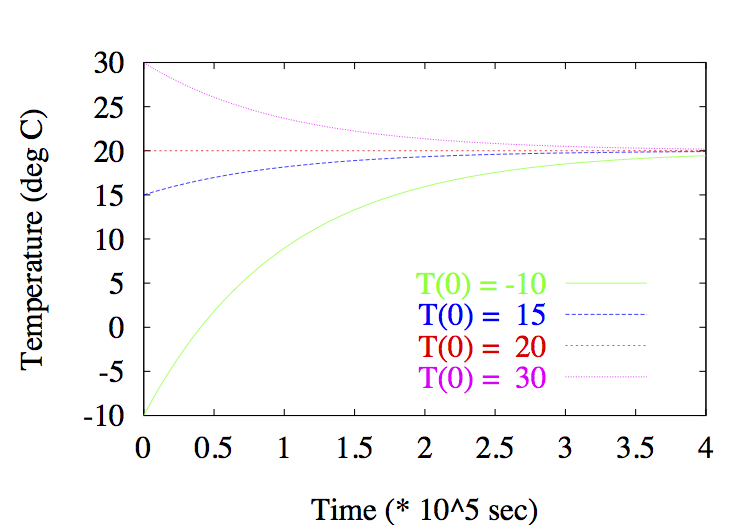

In [1]:
Image(filename='conduction/conduction.png',width='60%') 

<div id='lab1:fig:conduction'>
**Figure: Conduction** Plot of solution curves $T(t)$ for $T_0=-10,15,20,30$; parameter
values: $\lambda=10^{-5}$, $T_a=20$.
</div>

##Demo: Conduction
[lab1:demo:conduction]: <#Demo:-Conduction> "Conduction Demo"

Here is an interactive example that investigates the behaviour of the solution.

The first we import the function that does the calculation and plotting.  You need to run this cell ([how to](#Running-Code-Cells)) to load it.  Loading it does not run the function.  

In [3]:
from numlabs.lab1 import temperature_conduction as tc

ImportError: No module named lab1

You need to call the function. Simpliest call is next cell. 

In [4]:
# simple call to temperature demo
tc.temperature()

NameError: name 'tc' is not defined

After running as is try changing To = To (the initial temperature), Ta = Ta (the ambient temperature) or la = λ (the effective conductivity) to investigate changes in the solution.

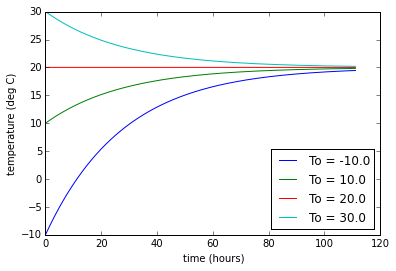

In [22]:
# setting different values 
# (note this uses the defaults again as written, you should change the values)
tc.temperature(Ta = 20, To = np.array([-10., 10., 20., 30.]), la = 0.00001)

*Example Two*
------------
<!--- {#lab1:exm:conduction-nonlinear} -->
[lab1:exm:conduction-nonlinear]: <#Example-Two> "Example 2"

> Suppose that the rock in the previous
example has a $\lambda$ which is *not* constant. For example, if that
the rock is made of a material whose specific heat varies with the
temperature or time, then $\lambda$ can be a function of $T$ or $t$.
This might happen if the material composing the rock undergoes a phase
transition at a certain critical temperature (for example, a melting ice
pellet). The problem is now a *non-linear* one, for which analytical
techniques may or may not provide a solution.

> If $\lambda=\lambda(T)$, a function of temperature only, then the exact
solution may be written as
$$T(t) = T_a + \exp{\left[-\int^{t}_{0} \lambda(T(s))ds \right]},$$
which involves an integral that may or may not be evaluated
analytically, in which case we can only approximate the integral.
Furthermore, if $\lambda$ is a function of both $T$ and $t$ which is
*not separable* (cannot be written as a product of a function of $T$ and
$t$), then we may not be able to write down a closed form for the
solution at all, and we must resort to numerical methods to obtain a
solution.

> Even worse, suppose that we don’t know $\lambda$ explicitly as a
function of temperature, but rather only from experimental measurements
of the rock (see Figure [Table](#lab1:fig:table) for an example). 

|    i   | Temperature ($T_i$)   |    Measured $\lambda_i$  |
|    -   | :------------------:  |    :-------------------: |
|    0   |       -5.0            |       2.92 |
|    1   |       -2.0            |       1.59 |
|    2   |       1.0             |       1.00 |
|    3   |       4.0             |       2.52 |
|    4   |       7.0             |       3.66 |   
|    5   |      10.0             |       4.64 |

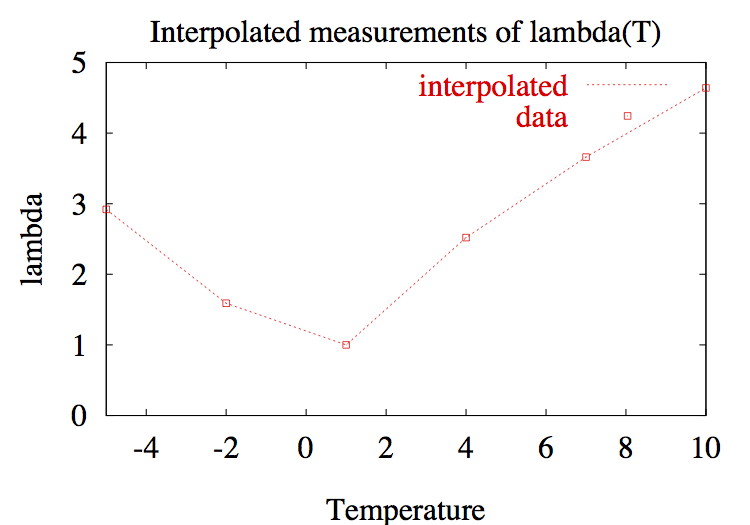

In [4]:
Image(filename="table/table-interp.png",width='60%')

> <div id='lab1:fig:table'>
**Figure Table**: A rock with $\lambda$ known only at a sequence of discrete temperature
values, from experimental measurements. The function $\lambda(T)$ can be
represented approximately using linear interpolation (and the resulting
approximate function can then be used to solve the problem
numerically.
</div>

>Then there is
no way to express the rock’s temperature as a function, and analytical
methods fail us, since we do not know the values at points between the
given values. One alternative is to approximate $\lambda$ at
intermediate points by joining successive points with straight lines
(this is called *linear interpolation*), and then use the resulting
function in a numerical scheme for computing the solution.

As the above example demonstrates, even for a simple ODE such as [1-d conduction](#lab1:eq:conduction1d), there
are situations where analytical methods are inadequate.

3.2 Partial Differential Equations
------------------------------

*Example Three*
--------------
[lab1:exm:diffusion1d]: <#Example-Three> "Example 3"

> The rock in [Example One](#Example-One) was
considered to be small enough that the effects of heat diffusion in the
interior were negligible in comparison to the heat lost by conduction
through its surface. In this example, consider a rock that is *not
small*, and whose temperature changes are dominated by internal
diffusion effects. Therefore, it is no longer possible to ignore the
spatial dependence in the problem.

> For simplicity, we will add spatial dependence in one direction only,
which corresponds to a “one-dimensional rock”, or a thin rod. Assume
that the rod is insulated along its sides, so that heat flows only along
its length, and possibly out the ends (see Figure [Rod](#lab1:fig:rock-1d)).

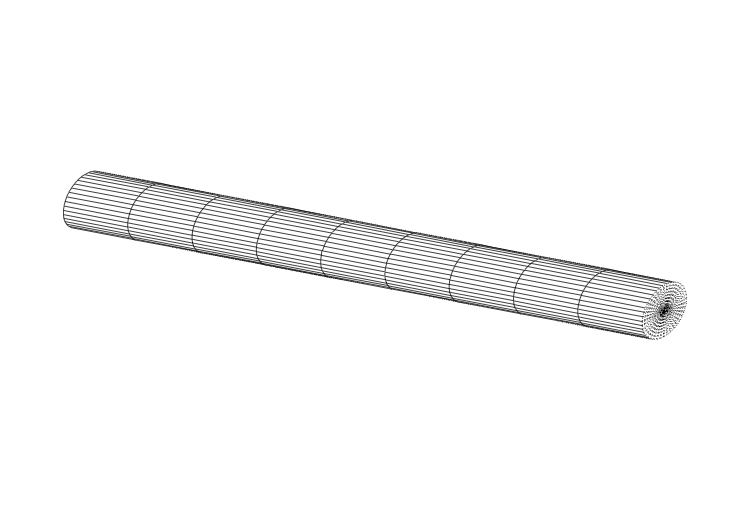

In [3]:
Image(filename='conduction/rod.png',width='60%')

<div id='lab1:fig:rock-1d'>
**Figure Rod**: A thin rod can be thought of as a model for a one-dimensional
rock.
</div>

> Consequently, the temperature varies only with position, $x$, and time,
$t$, and can be written as a function $u(x,t)$. The temperature in the
rod is governed by the following PDE $$u_t = \alpha^2 u_{xx},$$ for
which we have to provide an initial temperature $$u(x,0) = u_0(x),$$ and
boundary values $$u(0,t)=u(1,t)=0,$$ where

> -   $\alpha^2$ is the *thermal diffusivity* of the material,

> -   $u_0(x)$ is the initial temperature distribution in the rod, and

> -   the boundary conditions indicate that the ends of the rod are held
    at constant temperature, which we’ve assumed is zero.

> Thermal diffusivity is a quantity that depends only on the material from
which the bar is made. It is defined by
$$\alpha^2 = \frac{\kappa}{\rho c},$$ where $\kappa$ is the thermal
conductivity, $\rho$ is the density, and $c$ is the specific heat. A
typical value of the thermal diffusivity for a granite bar is
$0.011\;cm^2/sec$, and $0.0038\;cm^2/sec$ for a bar made of brick.

> Using the method of *separation of variables*, we can look for a
temperature function of the form $u(x,t)=X(x) \cdot T(t)$, which leads
to the infinite series solution
$$u(x,t) = \sum_{n=1}^\infty b_n e^{-n^2\pi^2\alpha^2 t}\sin{(n\pi x)},$$
where the series coefficients are
$$b_n = 2 \int_0^1 u_0(x) \sin{(n\pi x)} dx.$$

> **Mathematical Note:** Details of the derivation can be found in any introductory text in PDE’s
(for example, [Boyce and DiPrima (1986)](#Ref:BoyceDiPrima) [p. 549]).

> We do manage to obtain an explicit formula for the solution, which can
be used to calculate actual values of the solution. However, there are
two obvious reasons why this formula is not of much practical use:

> 1.  The series involves an infinite number of terms (except for very
    special forms for the initial heat distribution … such as the one
    shown below). We might be able to truncate the series, since each
    term decreases exponentially in size, but it is not trivial to
    decide how many terms to choose in order to get an accurate answer
    and here we are already entering the realm of numerical
    approximation.

> 2.  Each term in the series requires the evaluation of an integral. When
    these cannot be integrated analytically, we must find some way to
    approximate the integrals … numerical analysis rears its head once
    again!

> For most physical problems, an analytical expression cannot be obtained,
and the exact formula is not of much use.

> However, consider a very special case, when the initial temperature
distribution is sinusoidal, $$u_0(x) = \sin(\pi x).$$ For this problem,
the infinite series collapses into a single term
$$u(x,t) = e^{-\pi^2\alpha^2t}\sin{\pi x}.$$

> Sample solution curves are given in Figure [1d Diffusion](#lab1:fig:diffusion-1d).

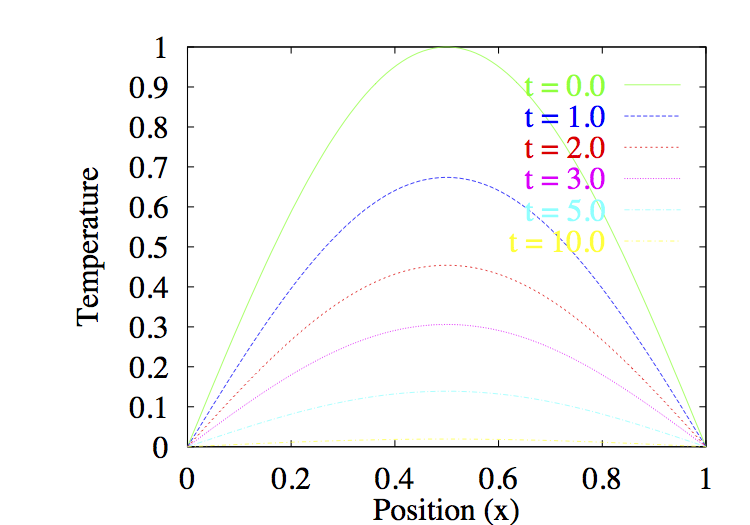

In [6]:
Image(filename='diffusion/diffusion.png',width='60%')

<div id='lab1:fig:diffusion-1d'>
**Figure 1d-diffusion** Temperature vs. position curves at various times, for heat diffusion
in a rod with sinusoidal initial temperature distribution and parameter
value $\alpha=0.2$.
</div>

##Movie: Diffusion
Here is a movie of the exact solution to the diffusion problem. Run the cell ([how to](#Running-Code-Cells)), then run the video.  If you want to see the video again, re-run the cell.  (The video doesn't rerun properly from the wysiwyg interface)

In [2]:
import IPython.display as display

vid = display.YouTubeVideo("b4D2ktTtw7E", modestbranding=1, rel=0, width=800)
display.display(vid)


#### Summary

This section is best summed up by the insightful comment of [Strang (1986)](#Ref:Strang)
[p. 587]:

> **Nature is nonlinear.**

Most problems arising in physics (which are non-linear) cannot be solved
analytically, or result in expressions that have little practical value,
and we must turn to numerical solution techniques.

4. Discretization
==============

When computing analytical solutions to differential equations, we are
dealing with *continuous functions*; i.e. functions that depend continuously
on the independent variables. A computer, however, has only finite
storage capacity, and hence there is no way to represent continuous
data, except approximately as a sequence of *discrete* values.

*Example Four*
--------------
> We already saw an example of a discrete function in
Example [Two](#Example-Two) where the rate function $\lambda$, depended on the temperature. If $\lambda$ is not known by
some empirical formula, then it can only be determined by experimental
measurements at a discrete set of temperature values. In
Figure [Table](#lab1:fig:table), $\lambda$ is given at a sequence of six
temperature points ($(T_i, \lambda_i)$, for $i = 0, 1, \dots, 5)$),
and so is an example of a *discrete function*.

> The process of interpolation, which was introduced in
Example [Two](#Example-Two), will be considered in more
detail next.

*Example Five*
-------------

> Consider the two continuous functions
$$f(x)=x^3-5x \;\; {\rm and} \;\; g(x)=x^{2/3} .$$ (In fact, $g(x)$ was
the function used to generate the values $\lambda(T)$ in
[Example Two](#Example-Two)).

> The representation of functions using mathematical notation or graphs is
very convenient for mathematicians, where continuous functions make
sense. However, a computer has a limited storage capacity, and so it can
represent a function only at a finite number of discrete points $(x, y)$.

> One question that arises immediately is: *What do we do if we have to
determine a value of the function which is not at one of the discrete
points?* The answer to this question is to use some form of
<span>*interpolation*</span> – namely to use an approximation procedure
to estimate values of the function at points between the known values.

> For example, linear interpolation approximates the function at
intermediate points using the straight line segment joining the two
neighbouring discrete points. There are other types of interpolation
schemes that are more complicated, a few of which are:

>-   quadratic interpolation: every two sucessive points are joined by a
    quadratic polynomial.

>-   cubic splines: each pair of points is joined by a cubic polynomial
    so that the function values and first derivatives match at each
    point.

>-   Fourier series: instead of polynomials, uses a sum of $\sin nx$ and
    $\cos nx$ to approximate the function (Fourier series are useful in
    analysis, as well as spectral methods).

>-   Chebyshev polynomials: another type of polynomial approximation
    which is useful for spectral methods.

>-   …many others …

>For details on any of these interpolation schemes, see a numerical
analysis text such as that by [Burden and Faires (1981)](#Ref-BurdenFaires).

> An application of linear interpolation to discrete versions of the
functions $f$ and $g$ is shown in Figure [f and g](#lab1:fig:discrete-f).

> <div id='lab1:fig:discrete-f'>
![The functions $f$ and $g$ are known only at discrete points. The
function can be approximated at other values by linear interpolation,
where straight line segments are used to join successive points.](discrete/f.png) 
![The
functions $f$ and $g$ are known only at discrete points. The function
can be approximated at other values by linear interpolation, where
straight line segments are used to join successive points.](discrete/g.png)
Figure Five, f and g: The functions $f$ and $g$ are known only at discrete points. The
function can be approximated at other values by linear interpolation,
where straight line segments are used to join successive points.
</div>

> Depending on the function, or number of location of the points chosen,
the approximation may be more or less accurate. In
Figure [f and g](#lab1:fig:discrete-f), it is not clear which function is
approximated more accurately. In the graph of $f(x)$, the error seems to
be fairly small throughout. However, for the function $g(x)$, the error
is large near $x=0$, and then very small elsewhere. This problem of
*accuracy* of discrete approximations will come up again and again in
this course.

## Demo: Interpolation
[lab1:demo:discrete]: <#Demo:-Interpolation> "Interpolation Demo"
Here is an interactive example demonstrating the use of interpolation (linear and cubic) in approximating functions. 

The next cell imports a module containing two python functions that interpolate the two algebraic functions, f and g ([Figure f and g](#lab1:fig:discrete-f)).  You need to run this cells ([how to](#Running-Code-Cells)) to load them.

In [4]:
from numlabs.lab1 import interpolate as ip

ImportError: No module named lab1

Once you have loaded the module, you can call the interpolation routines as ip.interpol_f(pn) and ip.interpol_g(pn).  pn is the number of points used the interpolation.  Watch what changing pn does to the solutions.

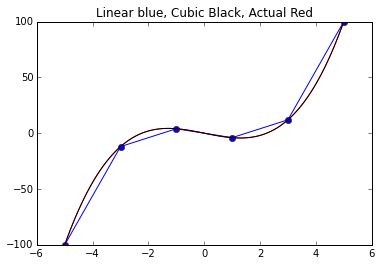

(array([-5., -3., -1.,  1.,  3.,  5.]),
 array([-100.,  -12.,    4.,   -4.,   12.,  100.]))

In [26]:
ip.interpol_f(6)

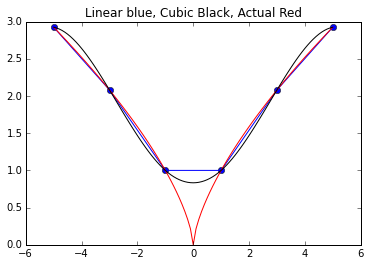

(array([-5., -3., -1.,  1.,  3.,  5.]),
 array([ 2.92401774,  2.08008382,  1.        ,  1.        ,  2.08008382,
         2.92401774]))

In [27]:
ip.interpol_g(6)

Interpolation Quiz 
--------------

 The accuracy of an approximation using
linear or cubic interpolation improves as the number of points is
increased.  True or False?

In the following, replace 'xxxx' by 'True', 'False', or 'Hint'

In [3]:
print (quiz.interpolation_quiz(answer = 'True'))

NameError: name 'quiz' is not defined

When solving differential equations numerically, it is essential to
reduce the continuous problem to a discrete one. The basic idea is to
look for an approximate solution, which is defined at a finite number of
discrete points. This set of points is called a *grid*. Consider the
one-dimensional conduction problem of Example [One, Conduction](#Example-One),
which in its most general form reads

<div id='lab1:eq:conduction'>
(Conduction Equation)
    $$\frac{dT}{dt} = -\lambda(T,t) \, (T-T_a),$$
</div>

  with initial temperature $T(0)$.

When we say we want to design a numerical procedure for solving this
initial value problem, what we want is a procedure for constructing a
sequence of approximations,
$$T_0, \, T_1, \, \ldots, \, T_i, \, \ldots,$$ defined at a set of
discrete $t$-points, $$t_0<t_1 < \cdots <t_i < \cdots$$ Each $T_i$ is an
approximation of the actual temperature at $t_i$; that is
$$T_i \approx T(t_i).$$ For now, we will consider equally-spaced points,
each of which is separated by a distance $\Delta t$, so that $$t_i=t_0+i \Delta t .$$
An example of such a grid is shown in Figure [Six, Grid](#lab1:fig:discrete-points).

<div id='lab1:fig:discrete-points'>
![A grid of equally-spaced points, $t_i=t_0+i\Delta t$, for $i=0,1,2,\ldots$.](discrete/grid.png)
Figure Six, Grid: A grid of equally-spaced points, $t_i=t_0+i\Delta t$, for $i=0,1,2,\ldots$.
</div>

This process of reducing a continuous problem to one in a finite number
of discrete unknowns is called *discretization*. The actual mechanics of
discretizing differential equations are introduced in the following
section.

Discretization Quiz 
--------------

What phrase best describes "discretization"?

**A** The development and analysis of methods for the
solution of mathematical problems on a computer.

**B** The process of replacing continuous functions by
discrete values.

**C** Employing the discrete Fourier transform to analyze the
stability of a numerical scheme.

**D** The method by which one can reduce an initial value
problem to a set of discrete linear equations that can be solved on a
computer. 

In the following, replace 'x' by 'A', 'B', 'C', 'D' or 'Hint'

In [29]:
print (quiz.discretization_quiz(answer = 'x'))

Acceptable answers are 'A', 'B', 'C', 'D' or 'Hint'


#### Summary

The basic idea in this section is that continuous functions can be
approximated by discrete ones, through the process of
*discretization*. In the course of looking at discrete
approximations in the interactive example, we introduced the idea of the
*accuracy* of an approximation, and showed that increasing the accuracy
of an approximation is not straightforward.

We introduced the notation for approximate solutions to differential
equations on a grid of points. The mechanics of discretization as they
apply to differential equations, will be investigated further in the
remainder of this Lab, as well as in Lab Two.

5. Difference Approximations to the First Derivative
=================================================
<!--- {#lab1:sec:diff-first-deriv} --->
[lab1:sec:diff-first-deriv]: <#5-Difference-Approximations-to-the-First-Derivative> "First Difference Approximation"

It only remains to write a discrete version of the differential equation ([Conduction Equation](#lab1:eq:conduction))
involving the approximations $T_i$. The way we do this is to approximate
the derivatives with *finite differences*. If this term is new to you,
then you can think of it as just another name for a concept you have
already seen in calculus. Remember the *definition of the derivative of
a function $y(t)$*, where $y^\prime(t)$ is written as a limit of a
divided difference:

<div id='lab1:eq:defn-deriv'>
(limit definition of derivative)
$$y^\prime(t) = \lim_{\Delta t\rightarrow 0} \frac{y(t+\Delta t)-y(t)}{\Delta t}.
  $$ 
</div>

  We can apply the same idea to approximate
the derivative $dT/dt=T^\prime$ in ([Conduction Equation](#lab1:eq:conduction)) by the *forward difference formula*,
using the discrete approximations, $T_i$:

<div id='lab1:eq:forward-diff'>
(Forward Difference Formula)
$$T^\prime(t_i) \approx \frac{T_{i+1}-T_i}{\Delta t}.$$
</div>

*Example Six*
------------

> In order to understand the ability of the formula ([Forward Difference Formula](#lab1:eq:forward-diff)) to approximate the
derivative, let’s look at a specific example. Take the function
$y(x)=x^3-5x$, and apply the forward difference formula at the point
$x=1$. The function and its tangent line (the short line segment with
slope $y^\prime(1)$) are displayed in Figure [Seven, Tangents](#lab1:fig:deriv).

> <div id='lab1:fig:deriv'>
![Plot of the function $y=x^3-5x$ and the forward difference
approximations to the derivative for various values of $\Delta t$](deriv/deriv.png)
Figure Seven, Tangents: Plot of the function $y=x^3-5x$ and the forward difference
approximations to the derivative for various values of $\Delta t$
</div>

> Each of the remaining line segments represents the forward difference
approximation to the tangent line for different values of $\Delta t$, which are
simply *the secant lines through the points $(t, y(t))$ and
$(t+\Delta t, y(t+\Delta t))$*. Notice that the approximation improves as $\Delta t$ is
reduced. This motivates the idea that grid refinement improves the
accuracy of the discretization …but not always (as we will see in the
coming sections).

## Investigation

Investigate the use of the forward difference approximation of the derivative in the following interactive example.  

The next cell loads a python function that plots a function f(x) and approximates its derivative at $x=1$ based on a second x-point that you chose (xb).  You need to run this cell ([how to](#Running-Code-Cells)) to load it.

In [31]:
from numlabs.lab1 import derivative_approx as da

Once you have loaded the function you can call it as da.plot_secant(xb) where xb the second point used to estimate the derivative (slope) at $x=1$.  You can compare the slope of the estimate (straight line) to the slope of the function (blue curve).

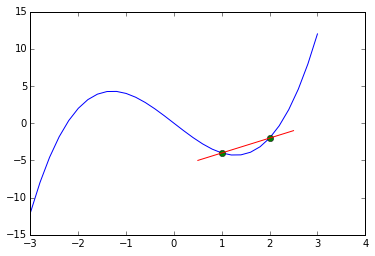

In [32]:
da.plot_secant(2.)

5.1 Forward Euler Method
-----------------------
<!--- #lab1:sec:forward-euler} --->
[lab1:sec:forward-euler]: <#5.1-Forward-Euler-Method"

We can now write down a discrete version of our model ODE problem ([Conduction Equation](#lab1:eq:conduction)) at any
point $t_i$ by

1.  discretizing the derivative on the left hand side (for example,
    using the forward difference approximation ([Forward Difference Formula](#lab1:eq:forward-diff));

2.  evaluating the right hand side function at the discrete point $t_i$.

The discrete form of the problem is

$$\frac{T_{i+1}-T_i}{\Delta t} = \lambda(T_i,t_i) \, (T_i-T_a),$$ or, after
rearranging, 

<div id='lab1:eq:forward-euler-conduction'>
$$T_{i+1} = T_i + \Delta t \, \lambda(T_i,t_i) \, (T_i-T_a).$$ 
</div>

This formula is called the
*Forward Euler method* (since it uses forward differences). Notice that
this formula relates each discrete solution value to the solution at the
preceding $t$-point. Consequently, if we are given an initial value
$T(0)$, then all subsequent values of the solution are easily computed.

(**Note:** The forward Euler formula for the more general
first-order IVP in ([Model ODE](#lab1:eq:modelode')) is simply $y_{i+1} = y_i + \Delta t f(y_i,t_i)$.)

*Example Seven*
--------------
[lab1:exm:saturation]: (#Example-Seven")

> Let us now turn to another example in atmospheric
physics to illustrate the use of the forward Euler method. Consider the
process of condensation and evaporation in a cloud. The *saturation
ratio*, $S$, is the ratio of the vapour pressure to the vapour pressure
of a plane surface of water at temperature $T$. $S$ varies in time
according to the 

> <div id='lab1:eq:saturation'>
(saturation development equation)
$$\frac{dS}{dt} = \alpha S^2 + \beta S + \gamma,$$ 
</div>

> where $\alpha$, $\beta$ and $\gamma$
are complicated (but constant) expressions involving the physical
parameters in the problem (and so we won’t reproduce them here).

> What are some physically reasonable values of the parameters (other than
simply $\alpha<0$ and $\gamma>0$)?

> [Chen (1994)](#Ref:Chen) gives a detailed derivation of the equation, which is a
non-linear, first order ODE (i.e. non-linear in the dependent variable $S$,
and it contains only a first derivative in the time variable). Chen also
derives an analytical solution to the problem which takes a couple pages
of messy algebra to come to. Rather than show these details, we would
like to use the forward Euler method in order to compute the solution
numerically, and as we will see, this is actually quite simple.

> Using the ([forward difference formula](#lab1:eq:forward-diff)), the discrete form of the ([saturation development equation](#lab1:eq:saturation))  is
$$S_{i+1} = S_i + \Delta t \left( \alpha S_i^2 + \beta S_i +
    \gamma \right).$$ Consider an initial saturation ratio of $0.98$,
and take parameter values $\alpha=-1$, $\beta=1$ and $\gamma=1$. The
resulting solution, for various values of the time step $\Delta t$,is plotted in
Figure [Eight, Saturation Time Series](#lab1:fig:saturation).

> <div id='lab1:fig:saturation'>
![Plot of the saturation ratio as a function of time using the Forward
Euler method. “” is the number of time steps.](feuler/sat2.png)
Figure Eight, Saturation Time Series: Plot of the saturation ratio as a function of time using the Forward
Euler method. “nt” is the number of time steps.
</div>

> There are two things to notice here, both related to the importance of
the choice of time step $\Delta t$:

> -   As $\Delta t$ is reduced, the solution appears to *converge* to one solution
    curve, which we would hope is the exact solution to the differential
    equation. An important question to ask is: *When will the numerical
    method converge to the exact solution as $\Delta t$ is reduced?*

> -   If $\Delta t$ is taken too large, however, the numerical solution breaks down.
    In the above example, the oscillations that occur for the largest
    time step (when $nt=6$) are a sign of <span>*numerical
    instability*</span>. The differential problem is stable and exhibits
    no such behaviour, but the numerical scheme we have used has
    introduced an instability. An obvious question that arises is: *How
    can we avoid introducing instabilities in a numerical scheme?*

> Neither question has an obvious answer, and both issues will be
investigated further in Lab 2.

5.2 Other Approximations
--------------------

Look again at the ([limit definition of derivative](#lab1:eq:defn-deriv)), and notice that an
equivalent expression for $T^\prime$ is

<div id='lab1:eq:defn-back'>
$$T^\prime(t) = \lim_{\Delta t\rightarrow 0} \frac{T(t)-T(t-\Delta t)}{\Delta t}.$$ 
</div>  
  
From this, we can derive the *backward
difference formula* for the first derivative,

<div id='lab1:eq:backward-diff'>
(Backward Difference Formula)
$$T^\prime(t_i) \approx \frac{T_i-T_{i-1}}{\Delta t},$$ 
</div>

and similarly the *centered difference formula* 

<div id='lab1:eq:centered-diff'>
(Centered Difference Formula)
$$T^\prime(t_i) \approx \frac{T_{i+1}-T_{i-1}}{2 \Delta t}.$$
</div>

The corresponding limit formulas are equivalent from a mathemtaical standpoint, **but the discrete formulas are not!** In particular, teh accuracy and stability of numerical schemes derived from the three difference formulas: ([Forward Difference Formula](#lab1:eq:forward-diff')), ([Backward Difference Formula](#lab1:eq:backward-diff')) and ([Centered Difference Formula](#lab1:eq:centered-diff))
 are quite different.  More will said on this in the next Lab.

#### Summary

This section introduces the use of the forward difference formula to
discretize the derivatives in a first order differential equation. The
resulting numerical scheme is called the forward Euler method. We also
introduced the backward and centered difference formulas for the first
derivative, which were also obtained from the definition of derivative.

You saw how the choice of grid spacing affected the accuracy of the
solution, and were introduced to the concepts of convergence and
stability of a numerical scheme. More will be said about these topics in
the succeeding lab, as well as other methods for discretizing
derivatives.

6. Generalizations
===============

The idea of discretization introduced in the previous section can be
generalized in several ways, some of which are:

-   problems with higher derivatives,

-   systems of ordinary differential equations,

-   boundary value problems, and

-   partial differential equations.

6.1 Higher Derivatives
------------------

Many problems in physics involve derivatives of second order and higher.
Discretization of these derivatives is no more difficult than the first
derivative in the previous section. The difference formula for the
second derivative, which will be derived in Lab \#2, is given by

<div id='lab1:eq:centered-diff2'>
(Centered Second Derivative)
$$y^{\prime\prime}(t_i) \approx 
  \frac{y(t_{i+1})-2y(t_i)+y(t_{i-1})}{(\Delta t)^2} ,$$
</div>

and is called the *second-order
centered difference formula* for the second derivative (“centered”,
because it involves the three points centered about $t_i$, and
“second-order” for reasons we will see in the next Lab). We will apply
this formula in the following example …

*Example Eight*
--------------
[lab1:exm:balloon]: <#Example-Eight>

> A weather balloon, filled with helium, climbs
vertically until it reaches its level of neutral buoyancy, at which
point it begins to oscillate about this equilibrium height. We can
derive a DE describing the motion of the balloon by applying Newton’s
second law: $$mass \; \times \; acceleration = force$$
$$m \frac{d^2 y}{d t^2} = 
      \underbrace{- \beta \frac{dy}{dt}}_{\mbox{air resistance}} 
      \underbrace{- \gamma y}_{\mbox{buoyant force}},$$ where

> -   $y(t)$ is the displacement of the balloon vertically from its
    equilibrium level, $y=0$;

> -   $m$ is the mass of the balloon and payload;

> -   the oscillations are assumed small, so that we can assume a linear
    functional form for the buoyant force, $-\gamma y$.

> This problem also requires initial values for both the initial
displacement and velocity:
$$y(0) = y_0 \;\; \mbox{and} \;\; \frac{dy}{dt}(0) = v_0.$$

> <div id='lab1:fig:balloon'>
![A weather balloon oscillating about its level of neutral
buoyancy.](balloon/balloon.png)
Figure Nine, Weather Balloon: A weather balloon oscillating about its level of neutral
buoyancy.
</div>

*Problem One*
------------
[lab1:prob:osc]: (#Problem-One)

> -   a\) Using the centered difference formula ([Centered Second Derivative](#lab1:eq:centered-diff2)) for the second derivative, and
    the forward difference formula ([Forward Difference Formula](#lab1:eq:forward-diff')) for the first derivative at the point
    $t_i$, derive a difference scheme for $y_{i+1}$, the vertical
    displacement of the weather balloon.

>-   b\) What is the difference between this scheme and the forward Euler
    scheme from [Example Seven](#Example-Seven] , *Fix Link* related to the initial
    conditions? (**Hint:** think about starting values …)

>-   c\) Given the initial values above, explain how to start the numerical
    integration.
    
*Note*: There are a number of problems in the text of each lab.  See the syllabus for which problems you are assigned as part of your course.  That is, you don't have to do them all!

6.2 Systems of First-order ODE's
----------------------------
[lab1:sec:ode-system]: (#6.2-Systems-of-First-order-ODE's)

Discretization extends in a simple way to first-order systems of ODE’s,
which arise in many problems, as we will see in some of the later labs.
For now, though, we can see:

*Example 9*
----------

> The second order DE for the weather balloon problem from
Example [Eight](#Example-Eight) can be rewritten by letting $u=dy/dt$. Then,
$$\frac{dy}{dt} = u$$
$$\frac{du}{dt} = -\frac{\beta}{m} u - \frac{\gamma}{m} y$$ which is a
system of first order ODE’s in $u$ and $y$. This set of differential
equations can be discretized to obtain another numerical scheme for the
weather balloon problem.

*Problem Two*
-------------
[lab1:prob:osc-system]: (#Problem-Two)

>-   a\) Derive a difference scheme for the problem based on the above system
    of two ODE’s using the forward difference formula for the first
    derivative.

>-   b\) By combining the discretized equations into one equation for y, show
    that the difference between this scheme and the scheme obtained in
    problem one is the difference formula for the second derivative.

6.3 Boundary Value Problem
------------------------
[lab1:sec:bvp]: (#6.3-Boundary-Value-Problems)


So far, we’ve been dealing with *initial value problems* or *IVP’s*
(such as the problem of heat conduction in a rock in
Example [One](#Example-One)): a differential equation is given for an
unknown function, along with its initial value. There is another class
of problems, called <span>*boundary value problems*</span> (or *BVP’s*),
where the independent variables are restricted to a *closed domain* (as
opposed to an *open domain*) and the solution (or its derivative) is
specified at every point along the boundary of the domain. Contrast this
to initial value problems, where the solution is *not given* at the end
time.

A simple example of a boundary value problem is the steady state heat
diffusion equation problem for the rod in
Example [Three](#Example-Three). By *steady state*, we mean simply that
the rod has reached a state where its temperature no longer changes in
time; that is, $\partial u/\partial t = 0$. The corresponding problem
has a temperature, $u(x)$, that depends on position only, and obeys the
following equation and boundary conditions: $$u_{xx} = 0,$$
$$u(0) = u(1) = 0.$$ This problem is known as an *initial-boundary value
problem* (or *IBVP*), since it has a mix of both initial and boundary
values.

The structure of initial and boundary value problems are quite different
mathematically: IVP’s involve a time variable which is unknown at the
end time of the integration (and hence the solution is known on an open
domain or interval), whereas BVP’s specify the solution value on a
closed domain or interval. The numerical methods corresponding to these
problems are also quite different, and this can be best illustrated by
an example.


*Example Ten*
------------
[lab1:exm:steady-diffusion]: (#Example-Ten)

> We can discretize the steady state diffusion
equation using the centered difference formula  for the second
derivative to obtain: $$u_{i+1}-2u_i+u_{i-1} = 0$$ where
$u_i\approx u(i/N)$ and $i=0,1,\ldots,N$ (and the factor of
$(\Delta x)^2 = {1}/{N^2}$ has been multiplied out). The boundary values
$u_0$ and $u_N$ are both known to be zero, so the above expression
represents a system of $N-1$ equations in $N-1$ unknown values $u_i$
that must be solved for *simultaneously*. The solution of such systems
of linear equations will be covered in more detail in Lab \#3 in fact, this
equation forms the basis for a Problem in the Linear Algebra Lab.

> Compare this to the initial value problems discretized using the forward
Euler method, where the resulting numerical scheme is a step-by-step,
marching process (that is, the solution at one grid point can be
computed using an explicit formula using only the value at the previous
grid point).


6.4 Partial Differential Equations
------------------------------

So far, the examples have been confined to ordinary differential
equations, but the procedure we’ve set out for ODE’s extends with only
minor modifications to problems involving PDE’s.

*Example 11*
-----------

> To illustrate the process, let us go back to the heat diffusion problem
from Example [Three](#Example-Three), an initial-boundary value problem
in the temperature $u(x,t)$: $$u_{t} = \alpha^2 u_{xx},$$ along with
initial values $$u(x,0) = u_0(x),$$ and boundary values
$$u(0,t) = u(1,t) = 0.$$

> As for ODE’s, the steps in the process of discretization remain the
same:

>  1)  First, replace the independent variables by discrete values
    $$x_i = i \Delta x = \frac{i}{M}, \;\; \mbox{where $i=0, 1,
          \ldots, M$, and}$$
    $$t_n = n \Delta t, \;\; \mbox{where $n=0, 1,
          \ldots$}$$ In this example, the set of discrete points define
    a two-dimensional grid of points, as pictured in
    Figure [Ten, PDE Grid](#lab1:fig:pde-grid).

    > <div id='lab1:fig:pde-grid'>
    ![The computational grid for the heat diffusion problem, with
    discrete points $(x_i,t_n)$.](pdes/pde-grid.png)
    Figure Ten, PDE Grid: The computational grid for the heat diffusion problem, with
    discrete points $(x_i,t_n)$.
    </div>

>  2)  Replace the dependent variables (in this example, just the
    temperature $u(x,t)$) with approximations defined at the grid
    points: $$U_i^n \approx u(x_i,t_n).$$ The boundary and initial
    values for the discrete temperatures can then be written in terms of
    the given information.

> 3)  Approximate all of the derivatives appearing in the problem with
    finite difference approximations. If we use the centered difference
    approximation ([Centered Second Derivative](#lab1:eq:centered-diff2)) for the second derivative in $x$, and
    the forward difference formula ([Forward Difference Formula](#lab1:eq:forward-diff')) for the time derivative (while evaluating the
    terms on the right hand side at the previous time level), we obtain
    the following numerical scheme:
    $$U_i^{n+1} = U_i^n + \frac{\alpha^2 \Delta t}{(\Delta x)^2} \left(
          U_{i+1}^n - 2 U_i^n + U_{i-1}^n \right).$$

>    Given the initial values, $U_i^0=u_0(x_i)$, and boundary values
$U_0^n=U_M^n=0$, this difference formula allows us to compute values of
temperature at any time, based on values at the previous time.

> There are, of course, other ways of discretizing this problem, but the
above is one of the simplest.

Mathematical Notes
==================
[lab1:ap:mathnote]: (#Mathematical-Notes)

Solution to the Heat Conduction Equation
----------------------------------------
[lab1:ap:conduction]: (#Solution-to-the-Heat-Conduction-Equation)

In Example [One](#Example-One), we had the equation
$$\frac{dT}{dt} = -\lambda (T-T_a),$$ subject to the initial condition
$T(0)$. This equation can be solved by *separation of variables*,
whereby all expressions involving the independent variable $t$ are moved
to the right hand side, and all those involving the dependent variable
$T$ are moved to the left $$\frac{dT}{T-T_a} = -\lambda dt.$$ The
resulting expression is integrated from time $0$ to $t$
$$\int_{T(0)}^{T(t)} \frac{dS}{S-T_a} = -\int_0^t\lambda ds,$$ (where
$s$ and $S$ are dummy variables of integration), which then leads to the
relationship $$\ln \left( T(t)-T_a)-\ln(T(0)-T_a \right) = -\lambda t,$$
or, after exponentiating both sides and rearranging,
$$T(t) = T_a + (T(0)-T_a)e^{-\lambda t},$$ which is exactly the [Conduction Solution](#lab1:eq:conduction-soln) equation.

References
======

<div id="Ref:BoyceDiPrima">
Boyce, W. E. and R. C. DiPrima, 1986: Elementary Differential Equations and Boundary Value Problems. John Wiley & Sons, New York, NY, 4th edition.
</div>
<div id="Ref:BurdenFaires">
Burden, R. L. and J. D. Faires, 1981: Numerical Analysis. PWS-Kent, Boston, 4th edition.
</div>
<div id="Ref:Chen">
Chen, J.-P., 1994: Predictions of saturation ratio for cloud microphysical models. Journal of the Atmospheric
Sciences, 51(10), 1332–1338.
</div><div id='Ref:Garcia'>
Garcia, A. L., 1994: Numerical Methods for Physics. Prentice-Hall, Englewood Cliffs, NJ.
</div><div id="Ref:Strang">
Strang, G., 1986: Introduction to Applied Mathematics. Wellesley-Cambridge Press, Wellesley, MA.
</div>

Glossary
========

**backward difference discretization:** used to estimate a derivative – uses the current points and points with smaller independent variable.

**boundary value problem:** a differential equation (or set of differential equations) along with boundary values for the unknown functions. Abbreviated BVP.

**BVP:** see *boundary value problem*

**centre difference discretization:** used to estimate a derivative – uses a discretization symmetric (in
independent variable) around the current point.

**closed domain:** a domain for which the value of the dependent variables is known on the boundary of the domain.

**converge:** as the discretization step (eg. ∆t) is reduced the solutions generated approach one solution curve.

**DE:** see *differential equation*

**dependent variable:** a variable which is a (possibly unknown) function of the independent variables in a problem; for example, in a fluid the pressure can be thought of as a dependent variable, which depends on the time t and position (x, y, z).

**differential equation:** an equation involving derivatives. Abbreviated DE.

**discretization:** when referring to DE’s, it is the process whereby the independent variables are replaced by a *grid* of discrete points; the dependent variables are replaced by approximations at the grid points; and the derivatives appearing in the problem are replaced by a *finite difference* approximation. The discretization process replaces the DE (or DE’s) with an algebraic equation or finite system of algebraic equations which can be solved on a computer.

**finite difference:** an approximation of the derivative of a function by a difference quotient involving values of the function at discrete points. The simplest method of deriving finite difference formulae is using Taylor series.

**first order differential equation:** a differential equation involving only first derivatives of the unknown functions.

**forward difference discretization:** used to calculate a derivative – uses the current points and points with larger independent variable.

**grid:** when referring to discretization of a DE, a grid is a set of discrete values of the independent variables, defining a *mesh* or array of points, at which the solution is approximated.

**independent variable:** a variable that does not depend on other quantities (typical examples are time, position, etc.)

**initial value problem:** a differential equation (or set of differential equations) along with initial values for the unknown functions. Abbreviated IVP.

**interpolation:** a method for estimating the value of a function at points intermediate to those where its values are known.

**IVP:** initial value problem

**linear:** pertaining to a function or expression in which the quantities appear in a linear combination. If $x_i$ are the variable quantities, and $c_i$ are constants, then any linear function of the $x_i$ can be written in the form $c_0 + \sum_i c_i \cdot x_i$.

**linear interpolation:** interpolation using straight lines between the known points

**Navier-Stokes equations:** the system of non-linear PDE’s that describe the time evolution of the flow of
a fluid.

**non-linear:** pertaining to a function or expression in which the quantities appear in a non-linear combination.

**numerical instability:** although the continuous differential equation has a finite solution, the numerical solution grows without bound as the numerical interation proceeds.

**ODE:** see *ordinary differential equation*

**open domain:** a domain for which the value of one or more dependent variables is unknown on a portion
of the boundary of the domain or a domain for which one boundary (say time very large) is not specified.

**ordinary differential equation:** a differential equation where the derivatives appear only with respect to one independent variable. Abbreviated ODE.

**partial differential equation:** a differential equation where derivatives appear with respect to more than one independent variable. Abbreviated PDE.

**PDE:** see *partial differential equation*

**second order differential equation:** a differential equation involving only first and second derivatives of the unknown functions.

**separation of variables:** a technique whereby a function with several dependent variables is written as a product of several functions, each of which depends on only one of the dependent variables. For example, a function of three unknowns, u(x, y, t), might be written as u(x, y, t) = X(x) · Y (y) · T (t).